In [1]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random
#Text Color
from termcolor import colored

#NLP
from sklearn.feature_extraction.text import CountVectorizer

#WordCloud
from wordcloud import WordCloud, STOPWORDS

#Text Processing
import re
import nltk

In [2]:
train = pd.read_csv('../input/shopee-product-matching/train.csv')
test = pd.read_csv('../input/shopee-product-matching/test.csv')
sample = pd.read_csv('../input/shopee-product-matching/sample_submission.csv')

In [3]:
print("Number of images in train dataset:",len(train))
print("Number of images in test dataset:",len(test))

Number of images in train dataset: 34250
Number of images in test dataset: 3


In [4]:
#Image Folder Paths
train_jpg_directory = '../input/shopee-product-matching/train_images'
test_jpg_directory = '../input/shopee-product-matching/test_images'

In [5]:
def getImagePaths(path):
    """
    Function to Combine Directory Path with individual Image Paths
    
    parameters: path(string) - Path of directory
    returns: image_names(string) - Full Image Path
    """
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

In [6]:
#Get complete image paths for train and test datasets
train_images_path = getImagePaths(train_jpg_directory)
test_images_path = getImagePaths(test_jpg_directory)

In [7]:
test_images_path

['../input/shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg',
 '../input/shopee-product-matching/test_images/0008377d3662e83ef44e1881af38b879.jpg',
 '../input/shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg']

In [8]:
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [9]:
test.head()

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title  
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...  
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...  
2   READY Lemonilo Mie instant sehat kuah dan goreng

In [10]:
#Checking missing data
train.isnull().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

In [11]:
len(train)

34250

In [12]:
#Column-wise unique values
for col in train.columns:
    print(col + ":" + colored(str(len(train[col].unique()))))

posting_id:34250
image:32412
image_phash:28735
title:33117
label_group:11014


In [13]:
# Function to display images:
def display_multiple_img(images_paths, rows, cols):
    """
    Function to Display Images from Dataset.
    
    parameters: images_path(string) - Paths of Images to be displayed
                rows(int) - No. of Rows in Output
                cols(int) - No. of Columns in Output
    """
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()



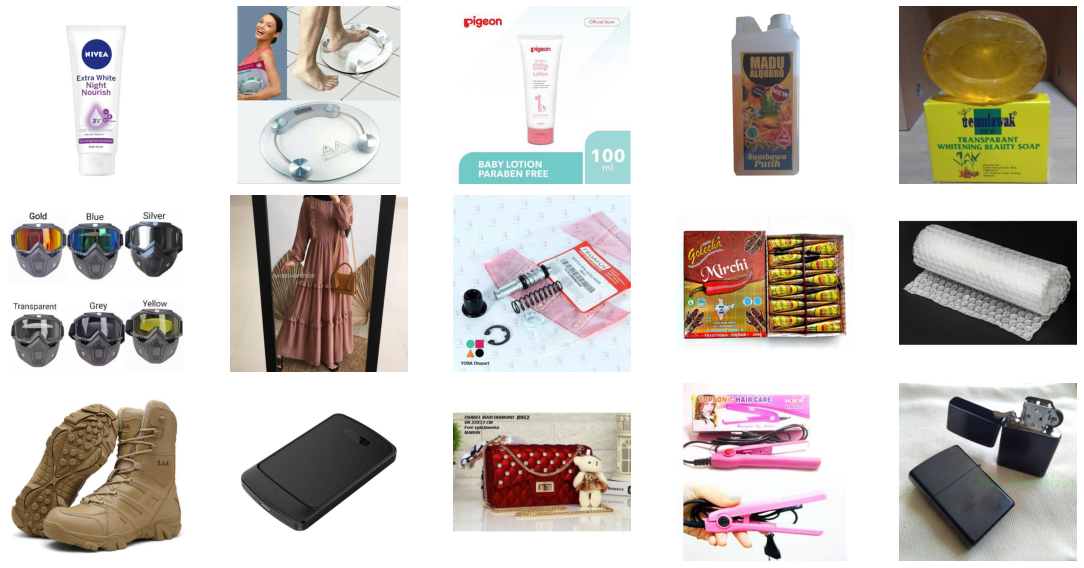

In [14]:
display_multiple_img(train_images_path[10:30], 3,5)


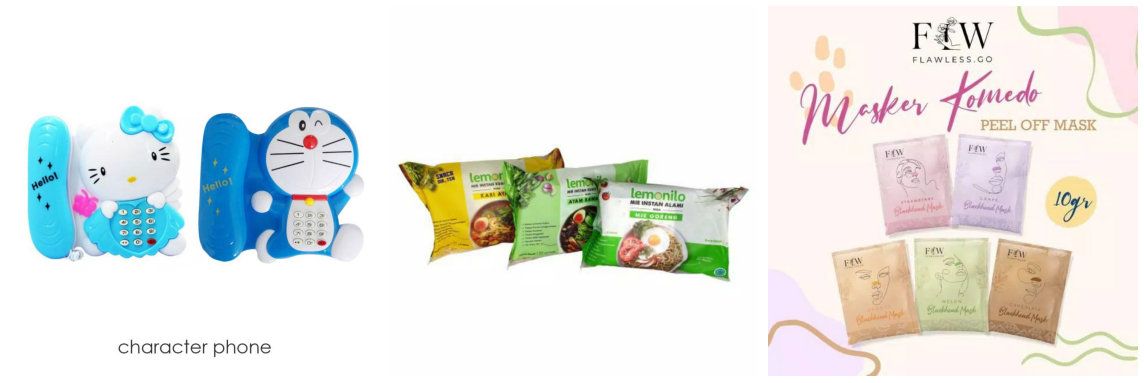

In [15]:
display_multiple_img(test_images_path, 1, 3)

In [16]:
top10 = pd.DataFrame(train.label_group.value_counts().head(10))
top10.reset_index(inplace=True)
top10.columns = ['label_group','count']
top10

label_group  count
0    994676122     51
1   1163569239     51
2   1141798720     51
3    159351600     51
4    562358068     51
5   3113678103     51
6   3627744656     51
7   3206118280     49
8   1733221456     46
9   1166650192     46

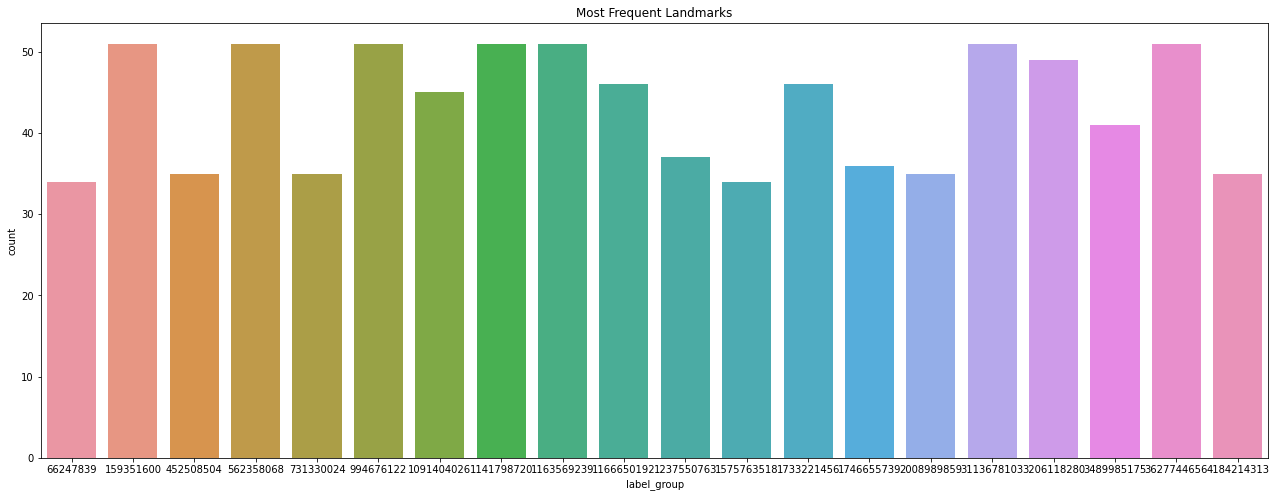

In [17]:
# Plot the most frequent landmark_ids
top20 = pd.DataFrame(train.label_group.value_counts().head(20))
top20.reset_index(inplace=True)
top20.columns = ['label_group','count']
top20
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (22, 8))
plt.title('Most Frequent Landmarks')
sns.set_color_codes("muted")
sns.barplot(x="label_group", y="count", data=top20, label="Count")
plt.show()

In [18]:
bot10 = pd.DataFrame(train.label_group.value_counts().tail(10))
bot10.reset_index(inplace=True)
bot10.columns = ['label_group','count']
bot10

label_group  count
0   1395102007      2
1   3907914144      2
2    257292447      2
3    406412315      2
4   2547455009      2
5   1349674444      2
6   2359590024      2
7   1528129430      2
8   3156068330      2
9     53836859      2

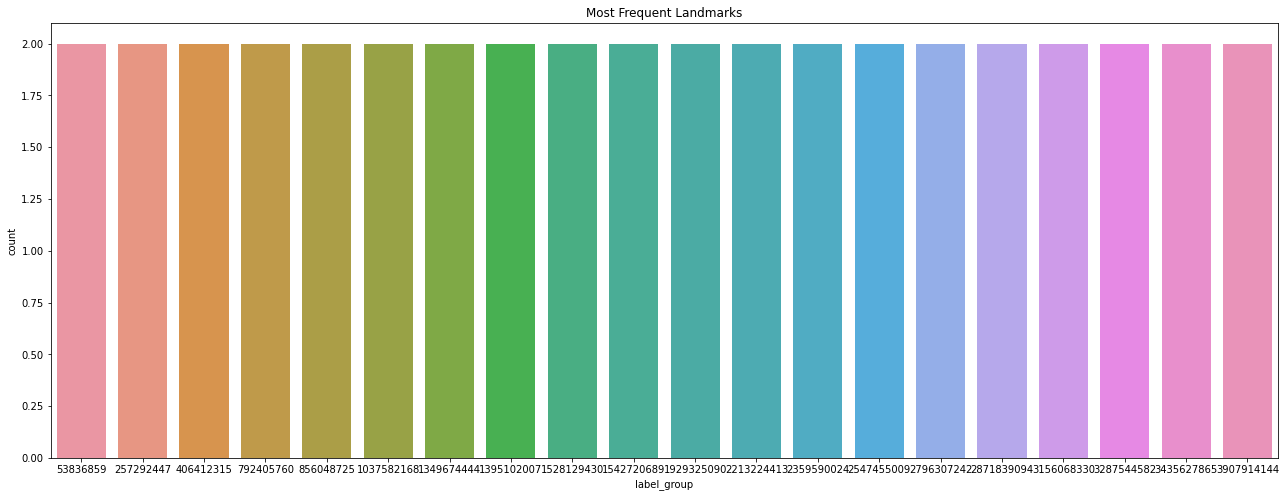

In [19]:
# Plot the least frequent products
bot20 = pd.DataFrame(train.label_group.value_counts().tail(20))
bot20.reset_index(inplace=True)
bot20.columns = ['label_group','count']

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (22, 8))
plt.title('Most Frequent Landmarks')
sns.set_color_codes("muted")
sns.barplot(x="label_group", y="count", data=bot20, label="Count")
plt.show()

In [20]:
#Number of products with more than 10 images:
counts = train['label_group'].value_counts().sort_values(ascending=False)
above10 = counts[counts >10].index.shape[0]
above10

233

In [21]:
#Number of lproducts with more than 20 images:
counts = train['label_group'].value_counts().sort_values(ascending=False)
above10 = counts[counts >20].index.shape[0]
above10

52

[Text(0.5, 0, 'Products'), Text(0, 0.5, 'Number of images')]

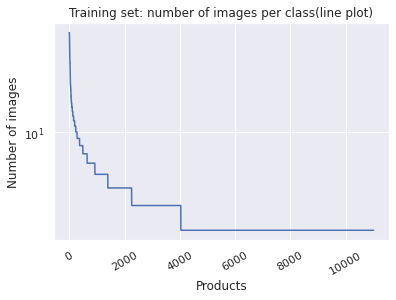

In [22]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
landmarks_fold = pd.DataFrame(train['label_group'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
ax = landmarks_fold['count'].plot(logy=True, grid=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Products", ylabel="Number of images")

In [23]:
#Adding file paths to train and test datasets:
def get_train_file_path(image_id):
    return "../input/shopee-product-matching/train_images/{}".format(image_id)
train['file_path'] = train['image'].apply(get_train_file_path)


def get_test_file_path(image_id):
    return "../input/shopee-product-matching/test_images/{}".format(image_id)
test['file_path'] = test['image'].apply(get_train_file_path)

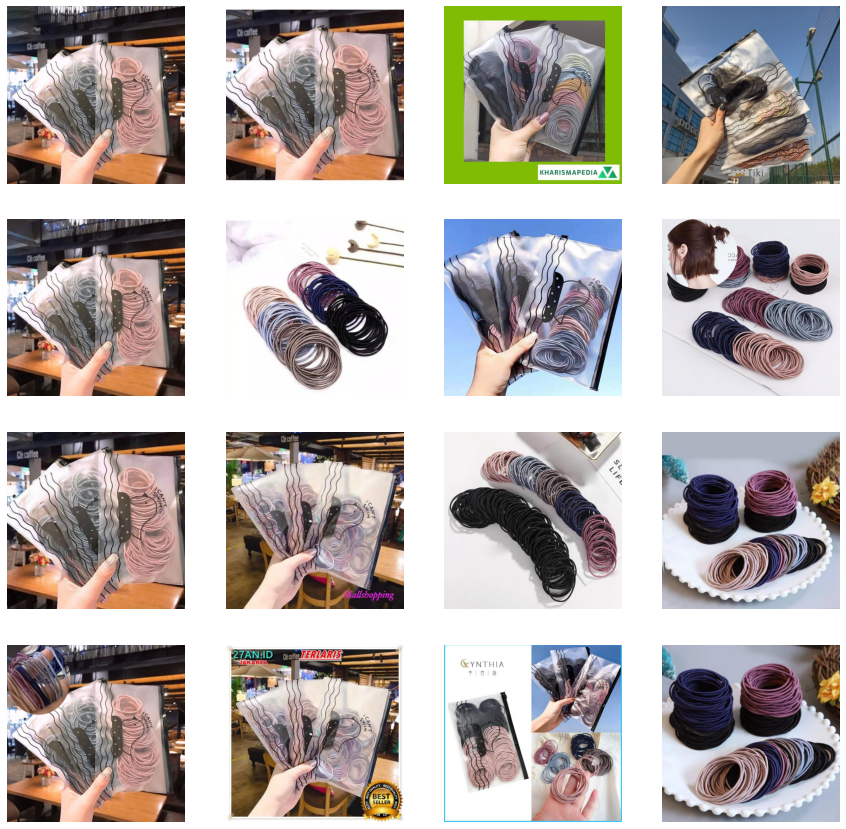

In [24]:
#Lets examine product with label_group is 994676122 which is having highest count :
import os
import glob
import cv2
train1 = train[train.label_group==994676122]
fig = plt.figure(figsize=(15,15))
x=1
for i in train1.file_path[:16]:
    image = cv2.imread(i)
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

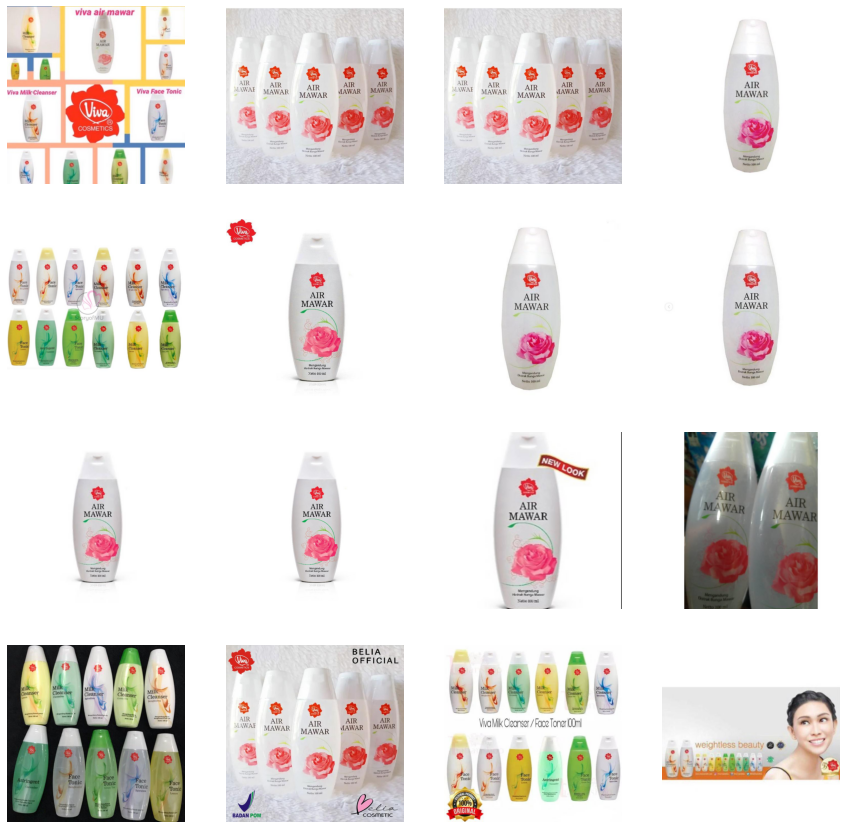

In [25]:
train2 = train[train.label_group==562358068]
fig = plt.figure(figsize=(15,15))
x=1
for i in train2.file_path[:16]:
    image = cv2.imread(i)
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

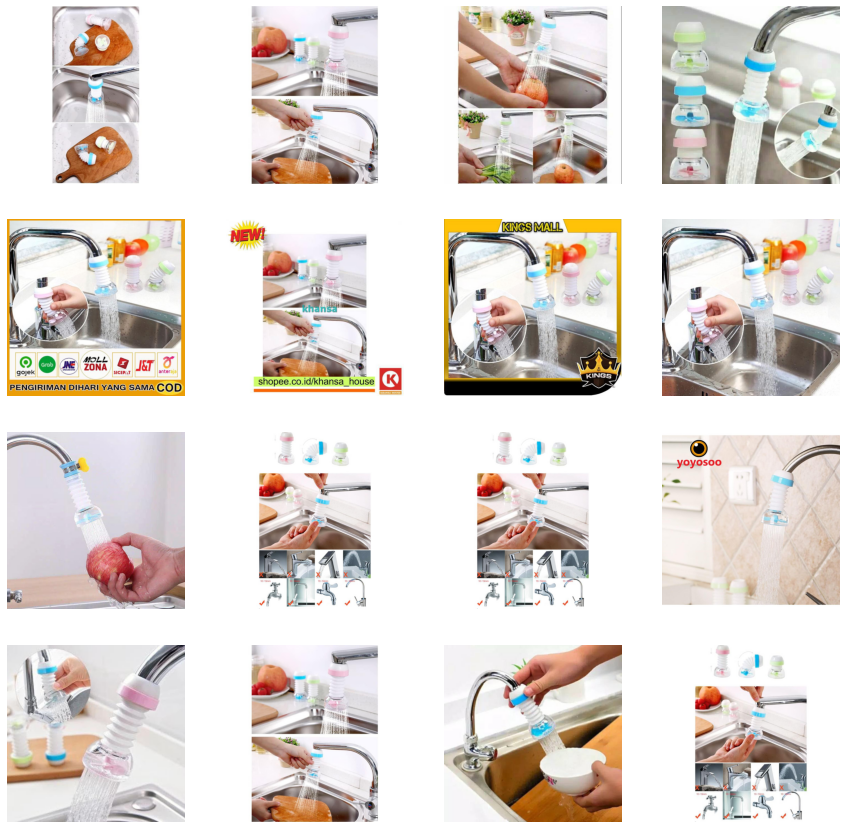

In [26]:
train3 = train[train.label_group==3113678103]
fig = plt.figure(figsize=(15,15))
x=1
for i in train3.file_path[:16]:
    image = cv2.imread(i)
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

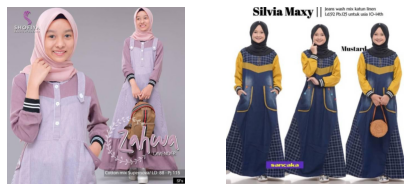

In [27]:

train4 = train[train.label_group==1395102007]
fig = plt.figure(figsize=(15,15))
x=1
for i in train4.file_path[:16]:
    image = cv2.imread(i)
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

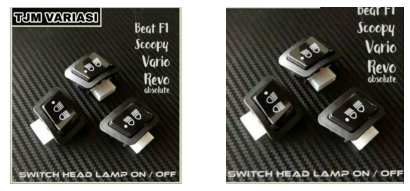

In [28]:

train4 = train[train.label_group==3907914144]
fig = plt.figure(figsize=(15,15))
x=1
for i in train4.file_path[:16]:
    image = cv2.imread(i)
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

In [29]:
#Exploring titles:
print(train.shape)
print(train['title'].nunique())

(34250, 6)
33117


In [30]:
t = train['title'].value_counts().sort_values(ascending=False).reset_index()
t.columns = ['title','count']
t

title  count
0         Koko syubbanul muslimin koko azzahir koko baju      9
1      Baju Koko Pria Gus Azmi Syubbanul Muslimin Kom...      8
2                                         Viva Air Mawar      6
3                   Monde Boromon Cookies 1 tahun+ 120gr      6
4      100 Pcs Ikat Rambut Karet Polos Elastis Gaya K...      6
...                                                  ...    ...
33112  HelloMaster - 665 - Tas Handbag Wanita KOREA F...      1
33113  Holder Hp ,  Mobil & Rumah Magic Suction 360 D...      1
33114                                     KARDUS PACKING      1
33115                    SANDAL WEDGES SPON KN 02 SILANG      1
33116  FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...      1

[33117 rows x 2 columns]

In [31]:
t. loc[t['count'] >1]

title  count
0       Koko syubbanul muslimin koko azzahir koko baju      9
1    Baju Koko Pria Gus Azmi Syubbanul Muslimin Kom...      8
2                                       Viva Air Mawar      6
3                 Monde Boromon Cookies 1 tahun+ 120gr      6
4    100 Pcs Ikat Rambut Karet Polos Elastis Gaya K...      6
..                                                 ...    ...
957      Wardah Renew You Anti Aging Facial Wash 100ml      2
958  Obeng set toolkit 31in1 / obeng service mini 3...      2
959                            Purbasari Hand Gel 50ml      2
960                Inez Satin Smooth Liquid Foundation      2
961         ORICO 2020U3 2.5-Inch Hard Drive Enclosure      2

[962 rows x 2 columns]

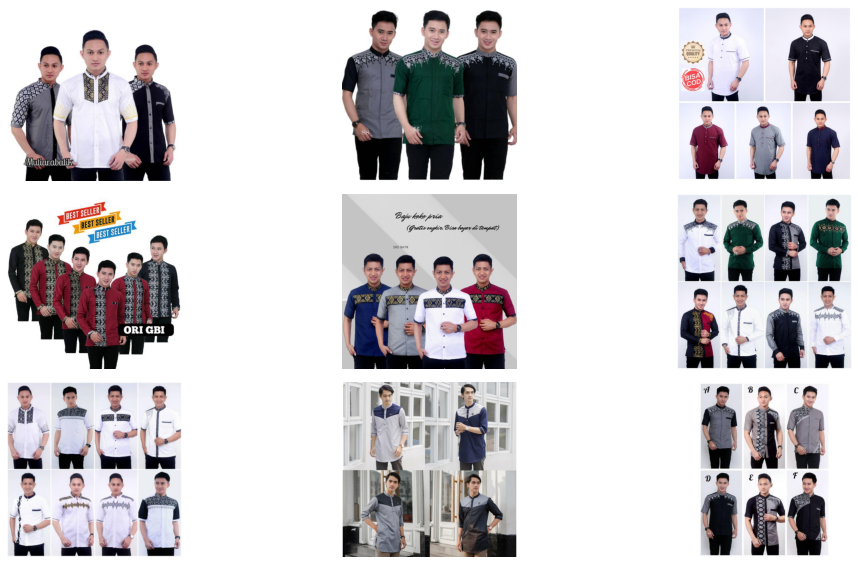

In [32]:
#Display images for First title = "Koko syubbanul muslimin koko azzahir koko baju"
path=train.loc[train["title"] == "Koko syubbanul muslimin koko azzahir koko baju","file_path"]
display_multiple_img(path,3,3)

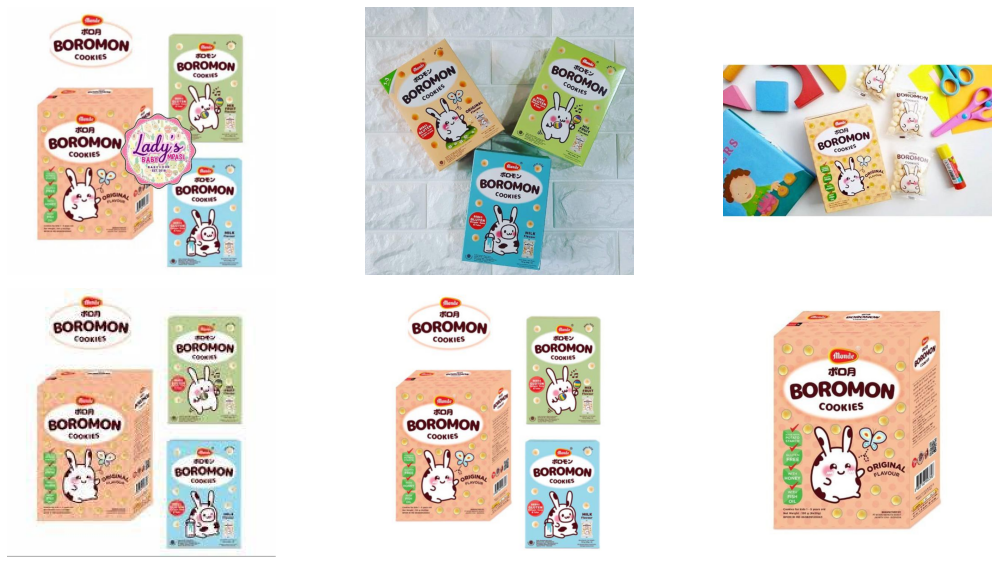

In [33]:
#Monde Boromon Cookies 1 tahun+ 120gr
path=train.loc[train["title"] == "Monde Boromon Cookies 1 tahun+ 120gr","file_path"]
display_multiple_img(path,2,3)

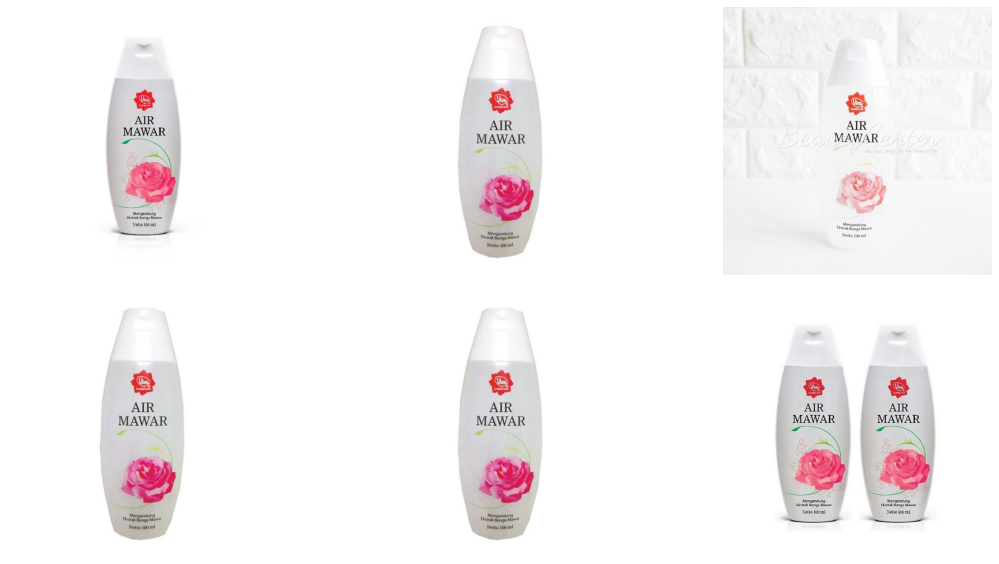

In [34]:
#Viva Air Mawar
path=train.loc[train["title"] == "Viva Air Mawar","file_path"]
display_multiple_img(path,2,3)

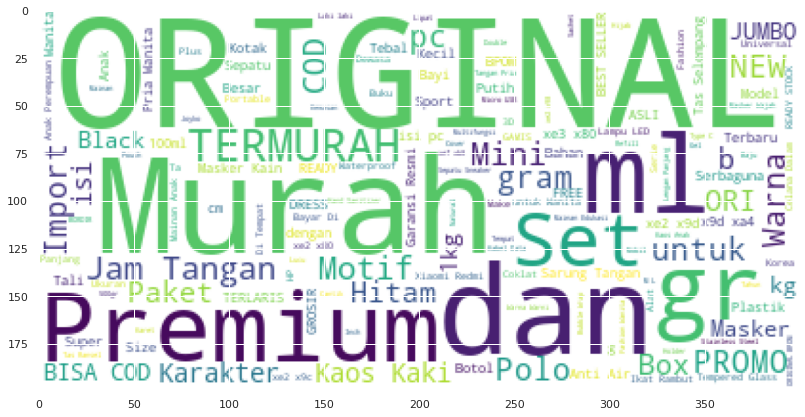

In [35]:
#wordcloud
wc = WordCloud(
    background_color='white',
    max_words = 150,
    random_state = 42,
    max_font_size=80
    )
wc.generate(' '.join(train["title"]))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [36]:
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188   
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069   

                                           file_path  
0  ../input/shopee-product-matching/train_images/...  
1  ../input/shopee-product-matching/train_images/...  
2  ../input/shopee-product-matching/train_images/...  
3  ../input/shopee-product-matching/train_images/...  
4  ../input/shopee-product-matching/train_images/...

In [37]:
#First we will work on labels i.e title
#From the fouth row we can see that the tile is not in english, on investigating it has been found that is in 
#Indonesian langauge

stopwords = nltk.corpus.stopwords.words('english')
stopwords1 = nltk.corpus.stopwords.words('indonesian')

In [38]:
def remove_stopwords(text):
    text1=" ".join([word for word in str(text).split() if word not in stopwords])
    return " ".join([word for word in str(text1).split() if word not in stopwords])
train["title"] = train["title"].apply(lambda text: remove_stopwords(text))
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 4,5 ORIGINAL / DOUB...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188   
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069   

                                           file_path  
0  ../input/shopee-product-matching/train_images/...  
1  ../input/shopee-product-matching/train_images/...  
2  ../input/shopee-product-matching/train_images/...  
3  ../input/shopee-product-matching/train_images/...  
4  ../input/shopee-product-matching/train_images/...

In [39]:
#removing Punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train["title"] = train["title"].apply(lambda text: remove_punctuations(text))
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 45 ORIGINAL  DOUBLE...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek  Motif Acak  Campur...   4093212188   
4                    Nescafe xc3x89clair Latte 220ml   3648931069   

                                           file_path  
0  ../input/shopee-product-matching/train_images/...  
1  ../input/shopee-product-matching/train_images/...  
2  ../input/shopee-product-matching/train_images/...  
3  ../input/shopee-product-matching/train_images/...  
4  ../input/shopee-product-matching/train_images/...

In [40]:
#convert to lower case
train["title"] = train["title"].str.lower()
# strip leading and trailing spaces
train["title"] = train["title"].str.strip(' ')
train.head()


posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          paper bag victoria secret    249114794   
1  double tape 3m vhb 12 mm x 45 original  double...   2937985045   
2        maling tts canned pork luncheon meat 397 gr   2395904891   
3  daster batik lengan pendek  motif acak  campur...   4093212188   
4                    nescafe xc3x89clair latte 220ml   3648931069   

                                           file_path  
0  ../input/shopee-product-matching/train_images/...  
1  ../input/shopee-product-matching/train_images/...  
2  ../input/shopee-product-matching/train_images/...  
3  ../input/shopee-product-matching/train_images/...  
4  ../input/shopee-product-matching/train_images/...

In [41]:
import gensim
from gensim import corpora, models
from pprint import pprint

In [42]:
#Dictionary and corpus 
documents = train["title"].tolist()

# remove common words and tokenize
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in documents
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [43]:
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]


In [44]:
#TF-IDF VEctorization
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidf_vect = TfidfVectorizer(min_df=5, max_df=0.7)
X_tfidf = tfidf_vect.fit_transform(train["title"])
X_f = pd.DataFrame(X_tfidf.toarray())
X_f.head()

0     1     2     3     4     5     6     7     8     9     ...  6873  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   6874  6875  6876  6877  6878  6879  6880  6881  6882  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 6883 columns]

#######################################
# Add 

In [45]:
test_f=tfidf_vect.transform(test['title'])
test_f = pd.DataFrame(test_f.toarray())

In [46]:
#small sample, 1/10 of X_f
small_sample = X_f.sample(n=int(len(X_f)/10))
len(small_sample)

3425

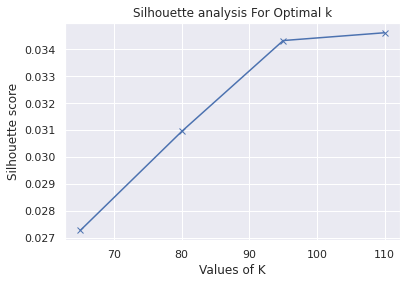

In [47]:
#After an initial silhouette_score with 25,50,75,100,125,150 we found out our ideal k is in the range of 75-100
#silhouette on small subset shows 80 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [65,80,95,110]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++',random_state=1374, max_iter=200)
 kmeans.fit(small_sample)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(small_sample, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [48]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=80, init='k-means++',random_state=1374, max_iter=200)
model.fit(X_f)
labels=model.labels_
train['text_cluster']=labels

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_f,train["text_cluster"])
y_predict_test = naive_bayes_classifier.predict(test_f)
y_predict_test

array([30,  4,  4], dtype=int32)

In [50]:
train.text_cluster.value_counts()

4     10361
8      1257
25      680
0       654
32      583
      ...  
57      114
51       98
48       81
18       73
15       64
Name: text_cluster, Length: 80, dtype: int64

In [51]:

first=train[train['text_cluster']==30]['posting_id'].values
second=train[train['text_cluster']==8]['posting_id'].values
third=train[train['text_cluster']==4]['posting_id'].values
test['predcited_by_text_kmean']=[first,second,third]
test

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title  \
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...   
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...   
2   READY Lemonilo Mie instant sehat kuah dan goreng   

                                           file_path  \
0  ../input/shopee-product-matching/train_images/...   
1  ../input/shopee-product-matching/train_images/...   
2  ../input/shopee-product-matching/train_images/...   

                             predcited_by_text_kmean  
0  [train_2410183091, train_2962272674, train_260...  
1  [train_2961381387, train_1241026177, train_324...  
2  [train_3369186413, train_1802986387, train_180...

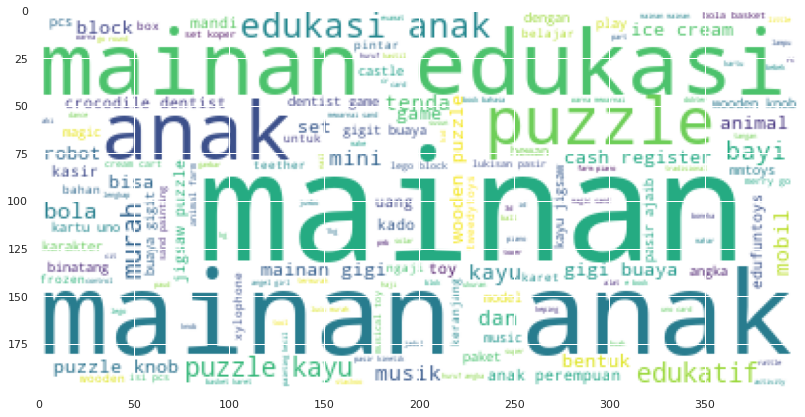

2    READY Lemonilo Mie instant sehat kuah dan goreng
Name: title, dtype: object

In [52]:
#For example, what is in cluster 30? toy,puzzle,child
b=train[train['text_cluster']==30]['title']

wc.generate(' '.join(b))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()
test.title.tail(1)
#in the title of first row of test we can see toys

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
score=naive_bayes_classifier.score(X_f,train['text_cluster'])
print('Accuracy of Naive Bayes and kmeans :')
print(score*100.0) #With 80 clusters we have 71 percent

Accuracy of Naive Bayes and kmeans :
72.22189781021898
